In [13]:
#
#
# Daily return
#
# Return at time t R_t is defined as 
#               P_t
#     R_t = ------------   - 1
#             P_(t-1)
# Price at time t, divided by the price at time t-1 (previous day) minus 1
# This gives the percent gain/loss if you get one stock on day t minus one and sold it the next day
# This can be used to analize the volatility of the stock
# If the distribution is wide, the stock is more volatile
# e.g. if the stock has a stable price then R_t is always zero..
#

In [ ]:
#
#
# Let's plot this, i.e. we add a column to each df from the close price cloumn
# There are 2 ways to do this
# - pandas native pct_change
# - the shift() function that uses the formula above

In [32]:
import yfinance as yf
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

In [10]:
# set the start and end dates for our market data request to be TTM
end_date = datetime.datetime.today()
start_date = end_date - timedelta(days=365)

# set the name of the ticker we want to download market data for
tickers = ["TSLA", "F", "GM" ]


In [11]:
df = yf.download(
    tickers=tickers,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)

<Axes: xlabel='Date'>

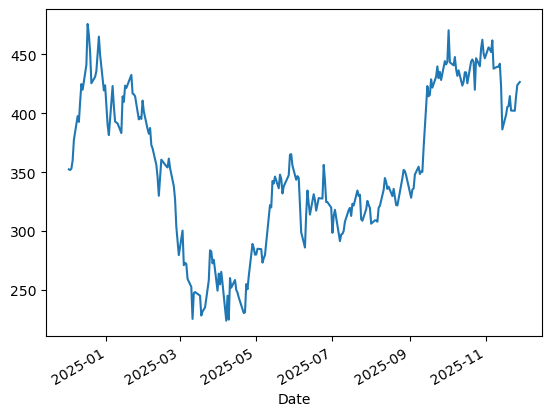

In [36]:
df['TSLA','Open'].plot()

In [29]:
#
#  Just showing how to work with multiple index
pprint.pprint((df['TSLA']['Close'] == df['TSLA','Close']).head(5))
print("---------")
pprint.pprint(df['TSLA']['Close'].head(5))
print("---------")
pprint.pprint(df['TSLA']['Close'].shift(1).head(5))
#
# Note that the shift(1) will move the prices forward one day
# which means that for day X we will get the price of X-1 
# which is exactly what we want

Date
2024-12-02    True
2024-12-03    True
2024-12-04    True
2024-12-05    True
2024-12-06    True
dtype: bool
---------
Date
2024-12-02    357.089996
2024-12-03    351.420013
2024-12-04    357.929993
2024-12-05    369.489990
2024-12-06    389.220001
Name: Close, dtype: float64
---------
Date
2024-12-02           NaN
2024-12-03    357.089996
2024-12-04    351.420013
2024-12-05    357.929993
2024-12-06    369.489990
Name: Close, dtype: float64


In [31]:
# df['returns'] = ( df['Close'] / df['Close'].shift(1) ) -1
# df.head(5)
df['Close']

KeyError: 'Close'